In [1]:
def gaussianmd(x, mu, Sigma):
    """
    Multivariate Gaussian
    """
    d = max(mu.shape)          # dimension
    dmah2 = np.dot(np.dot(x-mu, np.linalg.inv(Sigma)), x-mu)
    gx = 1.0 / ((2*np.pi)**(d/2) * np.linalg.det(Sigma)**0.5) * np.exp(-0.5 * dmah2)
    return gx

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_Gaussian(mu, Sigma):
    # plot the 3D Gaussian and contour map
    n = 100
    lx = mu[0] - 3 * Sigma[0, 0] ** 0.5
    ux = mu[0] + 3 * Sigma[0, 0] ** 0.5
    ly = mu[1] - 3 * Sigma[1, 1] ** 0.5
    uy = mu[1] + 3 * Sigma[1, 1] ** 0.5
    x = np.linspace(lx, ux, n)
    y = np.linspace(ly, uy, n)
    X, Y = np.meshgrid(x, y)
    XY = np.column_stack([X.flat, Y.flat])
    nrow, _ = XY.shape
    z = np.zeros(nrow)
    for i in range(nrow):
        z[i] = gaussianmd(XY[i,:], mu, Sigma)
    Z = np.reshape(z, X.shape)

    return X, Y, Z

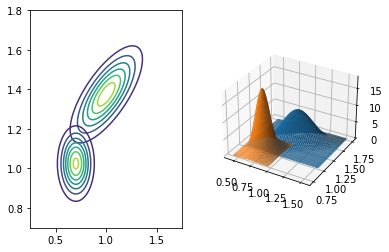

In [3]:
################ Problem 1b)
"""
Assume X holds the data sample for a certain class
"""
Sigma = np.cov(np.transpose(X))
mean = np.mean(X, axis = 0)

# plot the 3D Gaussian and contour map
XX, YY, Z = plot_Gaussian(mean, Sigma)

fig = plt.figure()
f1 = fig.add_subplot(121)
f2 = fig.add_subplot(122, projection = '3d')
f1.contour(XX, YY, Z)
f1.axis([0.25, 1.75, 0.7, 1.8])

f2.plot_surface(XX, YY, Z)